### Basics of inference

In [1]:
import numpy as np

sample = np.random.randint(18,45,50)
print(sample)

sample.mean()

[24 18 25 32 38 29 18 40 22 18 37 18 39 42 30 34 39 44 38 28 42 41 35 33
 24 38 35 28 38 29 43 42 31 29 29 34 20 19 32 22 30 26 22 22 24 25 37 26
 26 23]


30.36

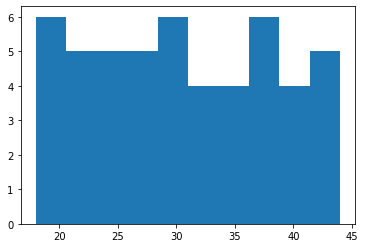

In [2]:
import matplotlib.pyplot as plt

plt.hist(sample)

plt.show()

In [3]:
from statsmodels.stats.weightstats import ztest
# statsmodels.stats.weightstats.ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
# https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

ztest(sample, value = 28)

# H0: mu = 28
# H1: mu != 28

# alpha we choose alpha = 0.05 therefore, our confidence is 95%

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(2.1516254116003863, 0.031426869037334666)

In [4]:
ztest(sample, value = 28, alternative="larger")

# H0: mu = 28
# H1: mu > 28

# alpha we choose alpha = 0.05 therefore, our confidence is 95%

(2.1516254116003863, 0.015713434518667333)

If I have a p-value lower than 0.05, I would say:
- I have enough evidence to reject H0, there fore, I assume H1 with a confidence of 95%

If the p-value is larger than 0.05:
- I don't have enough evidence to reject H0, so we accept is true with a confidence of 95%

# Assignment II

Second graded assignment of the course. There is not only one way to do some of the sections. Feel free to add some extra sections if you consider them interesting!

In [5]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Display settings
%matplotlib inline
sns.set_theme()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

##1. Generate population
Generate a list/array with the height of the population of Barcelona (1620343 inhab), where the mean is 173 cm and the standard deviation is 9.5 cm. Height is normally distributed.

In [7]:
pop_height = 9.5 * np.random.randn(1620343) + 173

In [8]:
# check
pop_height.mean()
print("")
pop_height.std()

172.99192327546874

9.498043540849281

In [9]:
# sort and check min-max
pop_height.sort()
print("Min height:", pop_height[0], "\t"
      "Max height:", pop_height[-1])

Min height: 127.06181624126413 	Max height: 224.89468942138785


##2. Plot distribution
Plot the distribution of the population (not the mean)

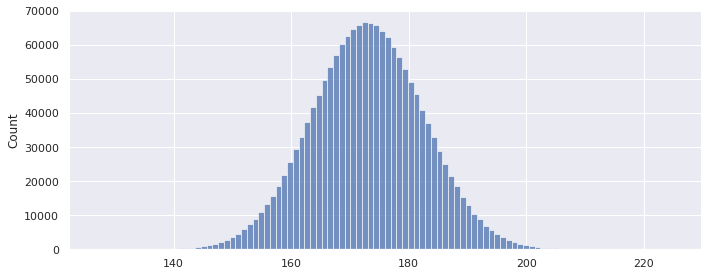

In [10]:
sns.displot(pop_height, kde=False, bins= 100, height=4, aspect=2.5)

##3. Outliers
How many cases are considered outliers? (we can use the definition of being above/below 1.5 x IQR, or 3 x IQR if we want to be more restrictive)

In [11]:
# Compute IQR (interquartile range)
q1 = np.percentile(pop_height, 25, interpolation = 'midpoint')
q3 = np.percentile(pop_height, 75, interpolation = 'midpoint')
iqr = q3-q1
print(f"Q1= {q1}\tQ3= {q3}\tIQR= {iqr}")

Q1= 166.59453022981901	Q3= 179.39769219303622	IQR= 12.803161963217207


In [12]:
# Outlier thresholds
print("Threshold = 1.5*IQR")
print("Lower = ", (q1-1.5*iqr), "\tUpper = ",(q3+1.5*iqr))
print("")
print("Threshold = 3*IQR")
print("Lower = ", (q1-3*iqr), "\tUpper = ",(q3+3*iqr))

Threshold = 1.5*IQR
Lower =  147.3897872849932 	Upper =  198.60243513786202

Threshold = 3*IQR
Lower =  128.1850443401674 	Upper =  217.80717808268784


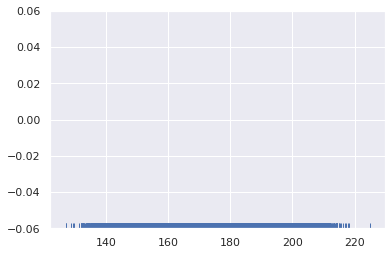

In [13]:
# Visual check with rugplot
sns.rugplot(pop_height)

NOTES

Based on the upper/lower thresholds above, I'm opting for 1.5xIQR to define outliers. Why?

On visual check, the 3xIQR seems a bit extreme. The 1.5xIQR thresholds also seem more intuitive based on what we may consider as 'outliers' in the adult population. Consider the Gasol brothers (NBA players) - Pau is 2.16m and Marc is 2.11m. I think most people will consider them unusually tall ("outliers") vs. the rest of Barcelones. As for the lower bound, unfortunately with this definition I can also be considered an outlier, but oh well ... 

In [14]:
# Compute
outlier_short = np.where(pop_height < (q1 - 1.5*iqr))
nb_short = len(outlier_short[0])
outlier_tall = np.where(pop_height > (q3 + 1.5*iqr))
nb_tall = len(outlier_tall[0])
# Output
print("NUMBER OF OUTLIERS")
print("Lower outliers (very short):", nb_short, 
      " or ", round(100*nb_short/len(pop_height),2),"%")
print("Upper outliers (very tall) :", nb_tall, 
      " or ", round(100*nb_tall/len(pop_height),2),"%")

NUMBER OF OUTLIERS
Lower outliers (very short): 5857  or  0.36 %
Upper outliers (very tall) : 5815  or  0.36 %


##4. Significance testing
**Generate a sample of 50 individuals, and using the Z-test, test $H_0 = 173$ against $H_1 \neq 173$. Use a confidence of 90%, 95%, 95.5% and 99%. Do you get different conclusions?**

*Remember: Confidence (and significance) are arbitrary values!! You use them as a threshold, but you never see them in the functions! Is what you use to decide if the values are extreme enough given some amount of risk*

In [15]:
# Select from population a random sample of n=50
sample = np.random.choice(pop_height, size=50, replace=False)

In [16]:
# Check sample
sample.sort()
print("First 5\t", sample[0:5])
print("Last 5\t", sample[-5:])
print("Mean\t", sample.mean(), "\t",
      "Min", sample.min(), "\t",
      "Max", sample.max())

First 5	 [144.22888537 156.56202047 158.81454175 159.67075712 160.31090284]
Last 5	 [185.5541032  185.57502664 189.5613715  192.42269159 195.20598049]
Mean	 172.78800874705402 	 Min 144.22888536658914 	 Max 195.20598048849612


In [17]:
# Get test statistics for sample, two-tail
z, p = ztest(sample, value = 173, alternative="two-sided")
print(f"z-value, 2-tail: {z} \t p-value, 2-tail: {p}")

z-value, 2-tail: -0.15985447468957764 	 p-value, 2-tail: 0.8729957111824965


In [18]:
# Sig test function
def sig_test(p):
  if p > 0.1:
    print("p is greater than alpha = 0.1 : we accept H0 at 90% CL")
  elif p > 0.05:
    print("p is greater than alpha = 0.05 : We accept H0 at 95% CL, but rejected at 90% CL")
  elif p > 0.045:
    print("p is greater than alpha = 0.045 : We accept H0 at 95.5% CL, but rejected at 90% and 95% CL")
  elif p > 0.01:
    print("p is greater than alpha = 0.01 : We accept H0 at 99% CL, but rejected at 90%, 95%, 95.5% CL")
  else:
    print("p is equal to or lower than alpha = 0.01 : We rejected H0 at 99% CL")

In [19]:
sig_test(p)

p is greater than alpha = 0.1 : we accept H0 at 90% CL


CONCLUSION<br>
Our null hypothesis (H0) states that the population mean is 173cm, while our sample has a mean of 175cm. Based on the test statistic on our sample, we can see that p-value > alpha, so there is not enough evidence to reject the null hypothesis. In this case we can accept that the average population height is 173cm. This conclusion is the same regardless of the confidence levels we applied (from 90% to 99%).

**4.1 Draw the Z-test for the population mean**

In [20]:
import scipy.stats as stats
from scipy.stats import norm

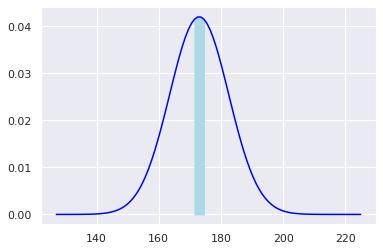

In [21]:
# Population stats
pop_mean = pop_height.mean()
pop_std = pop_height.std()
pop_min = pop_height.min()
pop_max = pop_height.max()

# Plot input
x = np.linspace(pop_min,pop_max, 100)
xfill = np.linspace((pop_mean - z*pop_std), (pop_mean + z*pop_std), 20)

# Draw (plot)
# Shaded area shows the region of population mean +/- z*stdev
plt.plot(x, stats.norm.pdf(x, pop_mean, pop_std), color='blue')
plt.fill_between(xfill, stats.norm.pdf(xfill, pop_mean, pop_std), color='lightblue')
plt.show()

**4.2 Does it change a lot if we test $H_0 = 173$ against $H_1 > 173$ ? Explain the differences**

In [22]:
# z and p from previous two-tail test
print(f"z-value, 2-tail: {z} \t p-value, 2-tail: {p}")

z-value, 2-tail: -0.15985447468957764 	 p-value, 2-tail: 0.8729957111824965


In [23]:
sig_test(p)

p is greater than alpha = 0.1 : we accept H0 at 90% CL


In [24]:
# Get test statistics for one-tail test
z1, p1 = ztest(sample, value = 173, alternative="larger")
print(f"z-value, 1-tail: {z1} \t p-value, 1-tail: {p1}")

z-value, 1-tail: -0.15985447468957764 	 p-value, 1-tail: 0.5635021444087518


In [25]:
sig_test(p1)

p is greater than alpha = 0.1 : we accept H0 at 90% CL


CONCLUSION<br>
* In the previous two-tail test, we did not have not enough evidence to reject the null hypothesis, so we accept that the average population height is 173cm.
* With the one-tail test, the p-value is greater, but compared against the one-tail alpha (0.1 to 0.01, from 90% to 99% confidence level) we can still accept the null hypothesis.

##5. Multiple tests, $H_0 = 173$ 
**Now we are going to generate 10000 samples of 50 individuals. For each of them, I want to apply the previous procedure, Z-test with 90, 95, 95.5 and 99% confidence! At the end, I want to see how many times I accepted  H0  and how many times I rejected it (which means I assume  H1  is happening) for each of them. Does it fit what we should expect?**

**Show it graphically**

In [26]:
# Counters for various hypotheses tests; always reset before re-running loop
accept_900=0
accept_950=0
accept_955=0
accept_990=0
reject_900=0
reject_950=0
reject_955=0
reject_990=0

# Testing 1000 samples (10K samples took too long!)
# H0 = 173
for i in range(1000):
  sample = np.random.choice(pop_height, size=50, replace=False)
  z, p = ztest(sample, value = 173, alternative="two-sided")
  
  if(p > .1):
    accept_900 +=1
    
  elif(p > .05):
    accept_950 +=1
    reject_900 +=1
    
  elif(p > .045):
    accept_955 +=1
    reject_900 +=1
    reject_950 +=1
    
  elif(p > .01):
    accept_990 +=1
    reject_900 +=1
    reject_950 +=1
    reject_955 +=1
  
  else:
    reject_990 +=1

In [27]:
# Showing summary of result in table
import pandas as pd

confidence = ['90% CL', '95% CL', '95.5% CL', '99% CL']
accept = [accept_900, accept_950, accept_955, accept_990]
reject = [reject_900, reject_950, reject_955, reject_990]

result = pd.DataFrame(np.zeros((4,2)), index= confidence, columns=['Accept','Reject'])
result['Accept'] = accept
result['Reject'] = reject
result

,Accept,Reject
90% CL,887,93
95% CL,47,46
95.5% CL,4,42
99% CL,42,20


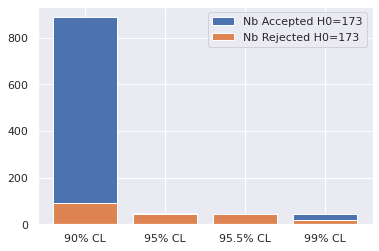

In [28]:
# Showing summary of result in graph
s1 = plt.bar(confidence, accept)
s2 = plt.bar(confidence, reject)
plt.legend((s1[0], s2[0]), ('Nb Accepted H0=173', 'Nb Rejected H0=173'))
plt.show()

CONCLUSION<br>
The result is consistent with expectation - the value for testing is close to population mean so we saw in most cases we accept H0 even with the lowest confidence level (90%)

##6. Multiple tests, $H_0 = 180$
**Replicate the previous point, testing  H0=180  against  H1≠180 . How many times have you accepted  H0 ? Can you link these results with the errors of type I and II?**

In [29]:
# Counters for various hypotheses tests; always reset before re-running loop
accept_900=0
accept_950=0
accept_955=0
accept_990=0
reject_900=0
reject_950=0
reject_955=0
reject_990=0

# Testing 1000 samples (10K samples took too long!)
# H0 = 180
for i in range(1000):
  sample = np.random.choice(pop_height, size=50, replace=False)
  z, p = ztest(sample, value = 180, alternative="two-sided")
  
  if(p > .1):
    accept_900 +=1
    
  elif(p > .05):
    accept_950 +=1
    reject_900 +=1
    
  elif(p > .045):
    accept_955 +=1
    reject_900 +=1
    reject_950 +=1
    
  elif(p > .01):
    accept_990 +=1
    reject_900 +=1
    reject_950 +=1
    reject_955 +=1
  
  else:
    reject_990 +=1

In [30]:
# Showing summary of result in table
confidence = ['90% CL', '95% CL', '95.5% CL', '99% CL']
accept2 = [accept_900, accept_950, accept_955, accept_990]
reject2 = [reject_900, reject_950, reject_955, reject_990]

result2 = pd.DataFrame(np.zeros((4,2)), index= confidence, columns=['Accept','Reject'])
result2['Accept'] = accept2
result2['Reject'] = reject2
result2

,Accept,Reject
90% CL,1,6
95% CL,1,5
95.5% CL,0,5
99% CL,5,993


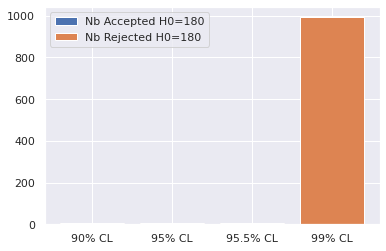

In [31]:
# Showing summary of result in graph
s1 = plt.bar(confidence, accept2)
s2 = plt.bar(confidence, reject2)
plt.legend((s1[0], s2[0]), ('Nb Accepted H0=180', 'Nb Rejected H0=180'))
plt.show()

CONCLUSION<br>
This time, in virtually all cases we rejected H0=180 -- so the average height of the population is most likely not 180cm!

TYPE I VS. TYPE 2 ERROR

* **Type I Error** or a false positive occurs when the null hypothesis is true, but we rejected it. For example: in the first multiple test with H0 = 173, we rejected a few cases at 99% CL (17 out of 1000 tests in the first run).

* **Type II Error** or a false negative occurs when the null hypothesis is false, but we didn't reject it. For example: in the second multiple test with H0 = 180, we didn't reject a few cases at 99% CL (6 out of 1000 in the first run). 

##7. (Extra) Outliers in multiple tests
**Test if the amount of outliers you have affects the final outcome of the test (for example, in section 5). You should face it like "is it more likely that I reject the null Hypothesis if I have more outliers?". It is an open exercise, so there is no "correct" way**

*HINT: Maybe this very last exercise makes more sense with only right-side outliers and the test suggested in section 4.2*

In [32]:
# Creating a new population by artificially injecting extreme outliers
more_short = np.linspace(pop_height.min(),(q1-3*iqr),1000)
more_tall = np.linspace((q3+3*iqr),pop_height.max(),1000)
pop_height_new = np.concatenate((pop_height,more_short,more_tall), axis=0)
pop_height_new.sort()

In [33]:
# Compute number of outliers in the new population with more outliers
outlier_short_new = np.where(pop_height_new < (q1 - 1.5*iqr))
nb_short_new = len(outlier_short_new[0])
outlier_tall_new = np.where(pop_height_new > (q3 + 1.5*iqr))
nb_tall_new = len(outlier_tall_new[0])

# Output - now we have more outliers
print("NUMBER OF OUTLIERS")
print("Lower outliers (very short):", nb_short_new, 
      " or ", round(100*nb_short_new/len(pop_height_new),2),"%")
print("Upper outliers (very tall) :", nb_tall_new, 
      " or ", round(100*nb_tall_new/len(pop_height_new),2),"%")

NUMBER OF OUTLIERS
Lower outliers (very short): 6857  or  0.42 %
Upper outliers (very tall) : 6815  or  0.42 %


NOTE: in the original population, we have 0.7% outliers (0.35% each for very short and very tall members of the population)

In [37]:
# Counters for various hypotheses tests; always reset before re-running loop
accept_900=0
accept_950=0
accept_955=0
accept_990=0
reject_900=0
reject_950=0
reject_955=0
reject_990=0

# Testing 1000 samples
# H0 = 173, two-sided test on the new population with outliers
for i in range(1000):
  sample = np.random.choice(pop_height_new, size=50, replace=False)
  z, p = ztest(sample, value = 173, alternative="two-sided")
  
  if(p > .1):
    accept_900 +=1
    
  elif(p > .05):
    accept_950 +=1
    reject_900 +=1
    
  elif(p > .045):
    accept_955 +=1
    reject_900 +=1
    reject_950 +=1
    
  elif(p > .01):
    accept_990 +=1
    reject_900 +=1
    reject_950 +=1
    reject_955 +=1
  
  else:
    reject_990 +=1

In [38]:
# Summary of result from testing 1000 samples drawn from the population with more outliers
# H0 = 173, two-tailed test
confidence = ['90% CL', '95% CL', '95.5% CL', '99% CL']
accept3 = [accept_900, accept_950, accept_955, accept_990]
reject3 = [reject_900, reject_950, reject_955, reject_990]

result3 = pd.DataFrame(np.zeros((4,2)), index= confidence, columns=['Accept','Reject'])
result3['Accept'] = accept3
result3['Reject'] = reject3
result3

,Accept,Reject
90% CL,879,102
95% CL,49,53
95.5% CL,5,48
99% CL,48,19


In [36]:
# Compare to previous result from testing 1000 samples drawn from the original population
# H0 = 173, two-tailed test
result

,Accept,Reject
90% CL,887,93
95% CL,47,46
95.5% CL,4,42
99% CL,42,20


CHECKING FOR TYPE I ERROR<br>
It seems that, when we have more outliers, we are *more likely to reject the null hypothesis* when it's true. In our two simulations with 1000 samples each, the likelihood of rejecting H0 at any confidence level went up from ~11% to 12% when the number of outliers went up from 0.35% to 0.42% of total sample. 